### Dimension Reduction Task02

- 뇌암 유전자 발현 데이터 세트를 회귀 분석하되, 차원 축소를 진행해본다.

In [31]:
import pandas as pd

b_df = pd.read_csv('./datasets/brain_cancer.csv', low_memory=False)
b_df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [32]:
b_df.duplicated().sum()

0

In [33]:
b_df.isna().sum().sum()

0

In [34]:
pre_b_df = b_df.drop(labels=['samples'], axis=1)
pre_b_df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
result = encoder.fit_transform(pre_b_df.type)
pre_b_df.type = result
pre_b_df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,0,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,0,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,0,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,0,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,4,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,4,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,4,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,4,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [36]:
pre_b_df.type.value_counts()

type
0    46
1    34
2    22
4    15
3    13
Name: count, dtype: int64

In [37]:
# pre_b_df.corr()['type'].sort_values(ascending=False)[1:]

In [38]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_b_df.iloc[:, 1:])
std_pre_b_df = pd.DataFrame(result, columns=pre_b_df.iloc[:, 1:].columns)
std_pre_b_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0.281734,-1.736304,-0.814542,-0.217100,-0.725018,-1.184185,-1.333998,0.553088,-0.189429,-0.055937,...,-3.937805,-3.063362,-3.368328,-2.732332,0.897836,0.268867,0.790096,0.113594,-0.696548,0.608331
1,1.004990,-1.150107,-0.496988,0.918622,-0.017358,-0.683315,-1.025756,2.343052,-0.683739,0.999013,...,-0.734738,-0.969428,-0.590331,-0.707073,0.083428,0.381955,-0.788721,-0.763316,-1.231041,-0.740878
2,1.005934,-0.292052,0.895202,0.738654,-0.485043,-0.247338,-1.480059,1.073633,2.588411,1.239468,...,-0.356680,-0.455420,-0.091946,-0.458744,0.442703,1.098238,0.535753,-0.591219,-0.402498,0.185009
3,0.228235,0.491046,-1.058556,-1.048181,-0.748240,0.626689,-0.381139,-0.190425,-1.297469,0.736078,...,-0.661774,-0.851095,-0.605492,-0.779546,-1.149432,-0.471656,-0.148096,0.322405,0.752725,-0.585045
4,0.538123,0.046420,3.709860,0.009951,-0.736216,-0.070977,-1.097124,0.599319,-0.736499,-0.429866,...,-1.579314,-1.045122,-0.133185,0.599587,-1.425683,-0.172871,-0.725682,-0.690563,-0.771828,-0.479759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.485107,0.109849,-0.048366,-0.055950,0.711424,1.012222,1.769656,-0.978959,0.952351,-0.929134,...,1.315909,1.401686,1.037736,1.225759,-1.330637,-1.883481,-0.229553,-0.119385,0.617781,-0.358746
126,0.681513,-0.386154,0.974571,-0.091039,-0.952518,-0.397080,0.546147,0.049232,0.097921,-0.744390,...,1.101618,0.958748,0.577300,0.629695,-0.075517,0.460963,-0.919634,-0.203942,0.002770,0.667883
127,0.547059,0.038965,0.048121,-1.358793,1.619374,0.927133,-0.348885,-0.248754,1.583142,-1.005822,...,0.747877,1.017127,1.675996,1.265570,-1.249327,-0.451001,-0.019103,-0.003202,0.854646,1.051999
128,0.518602,-0.709070,-0.478494,-1.086108,1.314546,0.392369,0.910877,-1.125418,0.252094,-0.652057,...,1.227245,1.372272,1.870338,1.870372,-1.523832,-0.329972,-0.809633,1.218691,0.235385,-0.104642


In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_features = pca.fit_transform(std_pre_b_df)
pca_df = pd.DataFrame(pca_features, columns=[f'pca{i+1}' for i in range(pca_features.shape[1])])
pca_df.loc[:, 'target'] = pre_b_df.type
pca_df

,pca1,pca2,target
0,165.162636,5.242744,0
1,85.226575,-53.098474,0
2,70.268971,-68.292286,0
3,-101.588357,-47.669343,0
4,65.807114,-55.921509,0
...,...,...,...
125,-104.694502,-33.498281,4
126,-42.579597,-25.177073,4
127,-116.932461,-38.582235,4
128,-119.738955,-10.468302,4


In [71]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.22405245 0.07916083]
0.3032132858074409


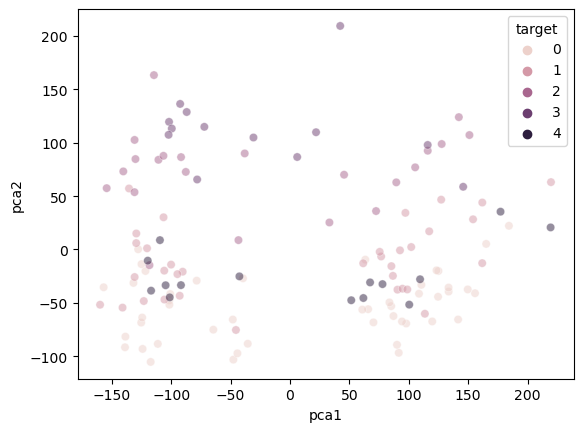

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='pca1', y='pca2', hue='target', data=pca_df, alpha=0.5)
plt.show()

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='micro')
    recall = recall_score(y_test , prediction, average='micro')
    f1 = f1_score(y_test, prediction, average='micro')
    # auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rfc = RandomForestClassifier()

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=4)), ('rfc', rfc)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=4)),
                ('rfc', RandomForestClassifier())])

오차 행렬
[[10  0  0  0  0]
 [ 1  2  0  0  1]
 [ 0  0  5  1  0]
 [ 0  0  0  1  1]
 [ 0  3  0  0  1]]
정확도: 0.7308, 정밀도: 0.7308, 재현율: 0.7308, F1: 0.7308
################################################################################


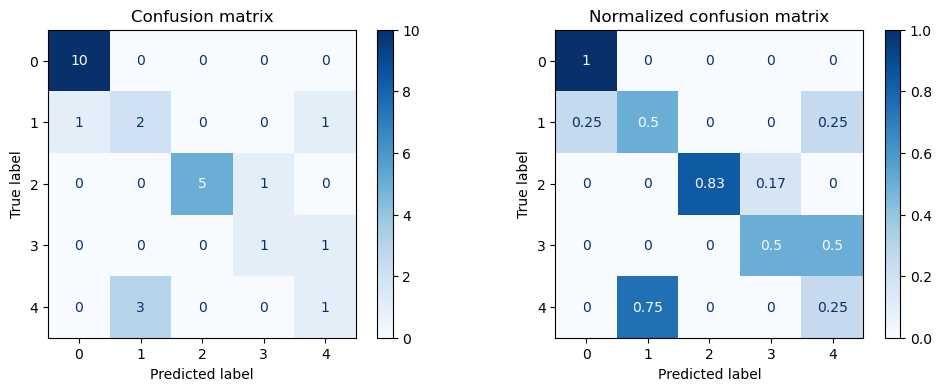

In [60]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction, pipe, X_test)

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

lda_features = lda.fit_transform(std_pre_b_df, pre_b_df.type)

print(lda_features.shape)

(130, 2)


In [82]:
lda_df = pd.DataFrame(lda_features, columns=[f'lda{i+1}' for i in range(lda_features.shape[1])])
lda_df.loc[:, 'target'] = pre_b_df.type
lda_df

,lda1,lda2,target
0,-3.132016,1.530567,0
1,-2.892360,1.267933,0
2,-1.126329,0.542963,0
3,-2.201854,0.969064,0
4,-2.190166,0.318826,0
...,...,...,...
125,0.973486,-2.877671,4
126,0.705241,-1.051368,4
127,-0.732309,-2.547357,4
128,0.242041,-1.844197,4


In [83]:
print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[0.45251815 0.24768481]
0.7002029634916652


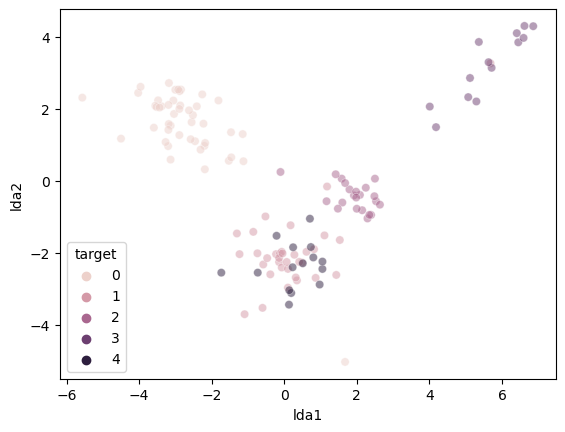

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='lda1', y='lda2', hue='target', data=lda_df, alpha=0.5)
plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

features, targets = lda_df.iloc[:, :-1], lda_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

parameters = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 50, 100]
}

rfc = RandomForestClassifier()

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, return_train_score=True, scoring='accuracy', n_jobs=-1, verbose=2)
g_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [85]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.837143,1
1,"{'max_depth': 5, 'min_samples_split': 50}",0.586190,4
2,"{'max_depth': 5, 'min_samples_split': 100}",0.355714,7
3,"{'max_depth': 10, 'min_samples_split': 10}",0.818571,2
4,"{'max_depth': 10, 'min_samples_split': 50}",0.586190,4
5,"{'max_depth': 10, 'min_samples_split': 100}",0.355714,7
6,"{'max_depth': 20, 'min_samples_split': 10}",0.799048,3
7,"{'max_depth': 20, 'min_samples_split': 50}",0.586190,4
8,"{'max_depth': 20, 'min_samples_split': 100}",0.355714,7


오차 행렬
[[9 0 0 0 0]
 [0 6 0 0 1]
 [0 0 4 0 0]
 [0 0 0 3 0]
 [0 3 0 0 0]]
정확도: 0.8462, 정밀도: 0.8462, 재현율: 0.8462, F1: 0.8462
################################################################################


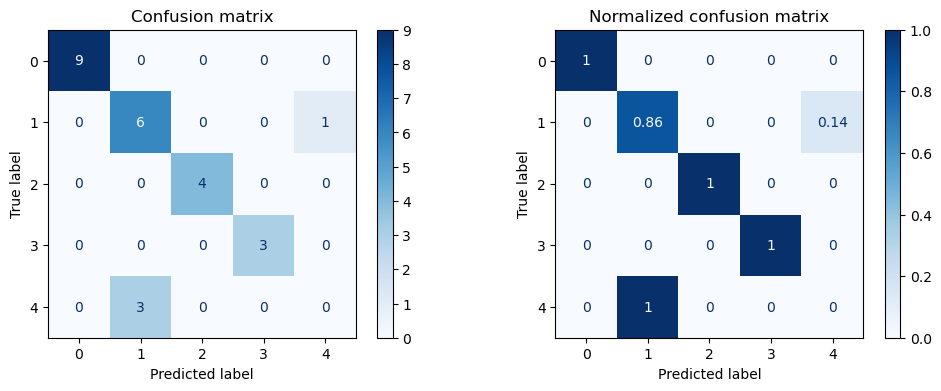

In [86]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)
get_evaluation(y_test, prediction, rfc, X_test)